In [8]:
import pandas as pd
import seaborn as sns
import scipy.stats as st
import sklearn as sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn import tree
import graphviz
import numpy as np

## Assignment 17

In [2]:
penguins = sns.load_dataset("penguins")
penguins = penguins.dropna()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [3]:
penguins_train, penguins_test = train_test_split(penguins.fillna(value=1).dropna(), test_size=0.3, random_state=42, stratify=penguins['species'])
print(penguins_train.shape, penguins_test.shape)

(233, 7) (100, 7)


In [5]:
penguins.corr()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.228626,0.653096,0.589451
bill_depth_mm,-0.228626,1.000000,-0.577792,-0.472016
flipper_length_mm,0.653096,-0.577792,1.000000,0.872979
body_mass_g,0.589451,-0.472016,0.872979,1.000000


In [16]:
features= ['flipper_length_mm']
dt_regression = DecisionTreeRegressor(max_depth = 2)
dt_regression.fit(penguins_train[features], penguins_train['body_mass_g'])

DecisionTreeRegressor(max_depth=2)

In [23]:
predictions_train = dt_regression.predict(penguins_train[features])
predictions_train

array([5007.5       , 3690.1459854 , 5574.13793103, 5574.13793103,
       3690.1459854 , 3690.1459854 , 3690.1459854 , 3690.1459854 ,
       3690.1459854 , 3690.1459854 , 3690.1459854 , 5007.5       ,
       5007.5       , 5007.5       , 5574.13793103, 4381.48148148,
       4381.48148148, 3690.1459854 , 3690.1459854 , 5007.5       ,
       5007.5       , 3690.1459854 , 3690.1459854 , 3690.1459854 ,
       5007.5       , 3690.1459854 , 3690.1459854 , 3690.1459854 ,
       3690.1459854 , 3690.1459854 , 3690.1459854 , 5007.5       ,
       3690.1459854 , 4381.48148148, 3690.1459854 , 3690.1459854 ,
       3690.1459854 , 3690.1459854 , 3690.1459854 , 5574.13793103,
       5007.5       , 3690.1459854 , 3690.1459854 , 4381.48148148,
       5007.5       , 3690.1459854 , 3690.1459854 , 5007.5       ,
       4381.48148148, 3690.1459854 , 5574.13793103, 5574.13793103,
       5007.5       , 4381.48148148, 5574.13793103, 3690.1459854 ,
       3690.1459854 , 3690.1459854 , 5007.5       , 3690.14598

In [24]:
predictions_test = dt_regression.predict(penguins_test[features])
predictions_test

array([3690.1459854 , 5007.5       , 5574.13793103, 5007.5       ,
       3690.1459854 , 5574.13793103, 4381.48148148, 3690.1459854 ,
       3690.1459854 , 5574.13793103, 3690.1459854 , 5007.5       ,
       3690.1459854 , 3690.1459854 , 3690.1459854 , 5007.5       ,
       3690.1459854 , 3690.1459854 , 3690.1459854 , 3690.1459854 ,
       3690.1459854 , 3690.1459854 , 3690.1459854 , 5574.13793103,
       4381.48148148, 5007.5       , 3690.1459854 , 3690.1459854 ,
       3690.1459854 , 3690.1459854 , 3690.1459854 , 5574.13793103,
       3690.1459854 , 5007.5       , 5007.5       , 3690.1459854 ,
       3690.1459854 , 3690.1459854 , 4381.48148148, 3690.1459854 ,
       5574.13793103, 3690.1459854 , 3690.1459854 , 5574.13793103,
       3690.1459854 , 3690.1459854 , 5007.5       , 4381.48148148,
       3690.1459854 , 3690.1459854 , 3690.1459854 , 3690.1459854 ,
       3690.1459854 , 5007.5       , 3690.1459854 , 3690.1459854 ,
       3690.1459854 , 3690.1459854 , 3690.1459854 , 3690.14598

In [19]:
def calculate_rmse(predictions, actuals):
    if(len(predictions) != len(actuals)):
        raise Exception("The amount of predictions did not equal the amount of actuals")
    
    return (((predictions - actuals) ** 2).sum() / len(actuals)) ** (1/2)

In [25]:
predictionsOnTrainset = dt_regression.predict(penguins_train[features])
predictionsOnTestset = dt_regression.predict(penguins_test[features])

rmseTrain = calculate_rmse(predictionsOnTrainset, penguins_train.body_mass_g)
rmseTest = calculate_rmse(predictionsOnTestset, penguins_test.body_mass_g)

print("RMSE on training set " + str(rmseTrain))
print("RMSE on test set " + str(rmseTest))

RMSE on training set 376.578459181854
RMSE on test set 446.4270328732305


!!!!!!!! Is the RMSE different? Did you expect this difference?

In [12]:
from sklearn import tree
import graphviz

def plot_tree_regression(model, features):
    # Generate plot data
    dot_data = tree.export_graphviz(model, out_file=None, 
                          feature_names=features,  
                          filled=True, rounded=True,  
                          special_characters=True)  

    # Turn into graph using graphviz
    graph = graphviz.Source(dot_data)  

    # Write out a pdf
    graph.render("decision_tree")

    # Display in the notebook
    return graph 

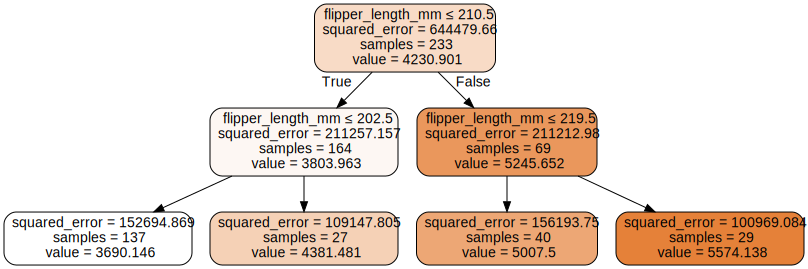

In [17]:
plot_tree_regression(dt_regression, features)

## Assignment 18

In [26]:
songs = pd.read_csv('songs.csv', index_col='Unnamed: 0', quotechar="`") 
songs

,Title,Artist,Genre,Year,BPM,Energy,Danceability,dB,Live,Valence,Duration,Acousticness,Speechiness,Popularity
1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599,Find U Again (feat. Camila Cabello),Mark Ronson,dance pop,2019,104,66,61,-7,20,16,176,1,3,75
600,Cross Me (feat. Chance the Rapper & PnB Rock),Ed Sheeran,pop,2019,95,79,75,-6,7,61,206,21,12,75
601,"No Brainer (feat. Justin Bieber, Chance the Ra...",DJ Khaled,dance pop,2019,136,76,53,-5,9,65,260,7,34,70
602,Nothing Breaks Like a Heart (feat. Miley Cyrus),Mark Ronson,dance pop,2019,114,79,60,-6,42,24,217,1,7,69


In [35]:
# songs_train, songs_test = train_test_split(songs.fillna(value=1).dropna(), test_size=1/3, random_state=42, stratify=songs['dB'])
# print(songs_train.shape, songs_test.shape)
songs.Artist.unique()

array(['Train', 'Eminem', 'Kesha', 'Lady Gaga', 'Bruno Mars',
       'Justin Bieber', 'Taio Cruz', 'OneRepublic', 'Alicia Keys',
       'Rihanna', 'Flo Rida', 'Mike Posner', 'Far East Movement', 'Usher',
       'Sean Kingston', 'The Black Eyed Peas', 'Adam Lambert', 'Maroon 5',
       'Neon Trees', 'Selena Gomez & The Scene', 'Enrique Iglesias',
       'Katy Perry', 'Britney Spears', '3OH!3', 'David Guetta',
       'Christina Aguilera', 'Florence + The Machine', 'Shakira',
       'Tinie Tempah', 'T.I.', 'Martin Solveig', 'Christina Perri',
       'Adele', 'Pitbull', 'Beyoncé', 'Hot Chelle Rae', 'Avril Lavigne',
       'Kanye West', 'LMFAO', 'Jessie J', 'Jennifer Lopez', 'Chris Brown',
       'Sleeping At Last', 'Nicki Minaj', 'P!nk', 'Coldplay',
       'One Direction', 'Taylor Swift', 'Carly Rae Jepsen',
       'Kelly Clarkson', 'Owl City', 'The Wanted', 'fun.',
       'Ellie Goulding', 'Gym Class Heroes', 'Avicii', 'The Script',
       'Miley Cyrus', 'Swedish House Mafia', 'Daft Punk'